In [2]:
import pandas as pd
import numpy as np
# Importing and Exporting Data
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df['math score'].mean()

np.float64(66.089)

In [4]:
df['math score'].median()

np.float64(66.0)

In [5]:
df['math score'].mode()

0    65
Name: math score, dtype: int64

In [6]:
q1 = df['math score'].quantile(0.25)  # Menghitung Q1
print("Q1 : ", q1)  # Mencetak Q1

q3 = df['math score'].quantile(0.75)  # Menghitung Q3
print("Q3 : ", q3)  # Mencetak Q3

iqr = q3 - q1  # Menghitung IQR
print("IQR : ", iqr)  # Mencetak IQR


Q1 :  57.0
Q3 :  77.0
IQR :  20.0


In [7]:
print(df[['math score', 'reading score', 'writing score']].dtypes)

math score       int64
reading score    int64
writing score    int64
dtype: object


<Axes: >

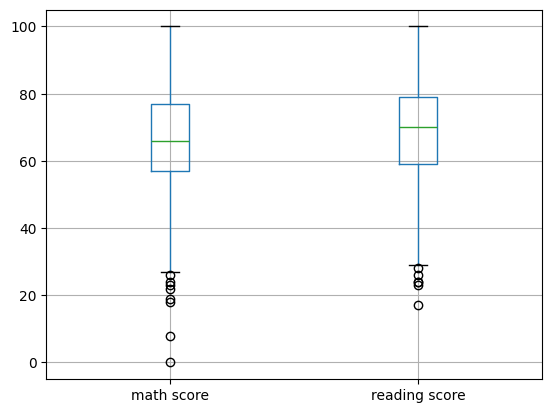

In [8]:
df.boxplot(column=['math score', 'reading score'])


In [9]:
# Menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan IQR untuk 'math score'
q1 = df['math score'].quantile(0.25)
print("Q1 (math score):", q1)
q3 = df['math score'].quantile(0.75)
print("Q3 (math score):", q3)
iqr = q3 - q1
print("IQR (math score):", iqr)

# Menentukan batas bawah dan batas atas untuk outlier di kolom 'math score'
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Mencari outlier pada kolom 'math score'
outliers_math = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]
print("Outlier math score:")
print(outliers_math)

# Anda bisa melakukan hal yang sama untuk kolom 'reading score' dan 'writing score'


Q1 (math score): 57.0
Q3 (math score): 77.0
IQR (math score): 20.0
Outlier math score:
     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22         

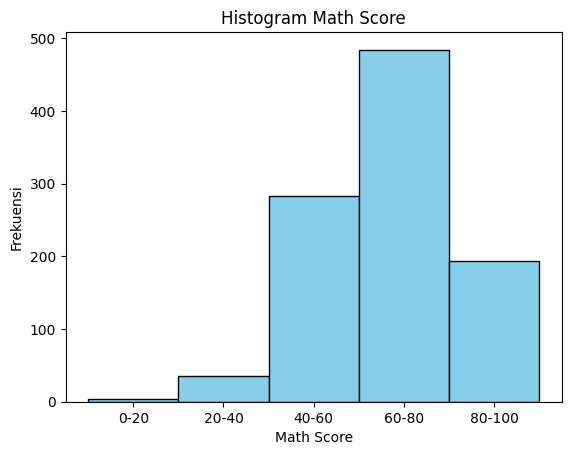

In [10]:
import matplotlib.pyplot as plt

# Ambil data kolom 'math score'
data_math = df["math score"]

# Buat histogram
n, bins, patches = plt.hist(data_math, bins=5, color='skyblue', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()


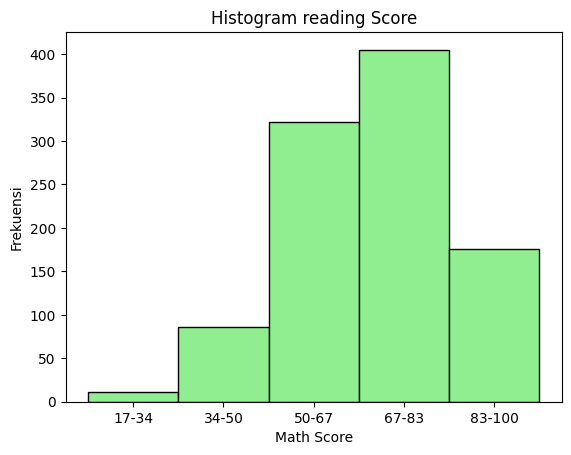

In [19]:
import matplotlib.pyplot as plt

# Ambil data kolom 'math score'
data_math = df["reading score"]

# Buat histogram
n, bins, patches = plt.hist(data_math, bins=5, color='lightgreen', edgecolor='black')

# Tambahkan Label
plt.title('Histogram reading Score')
plt.xlabel('Math Score')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()


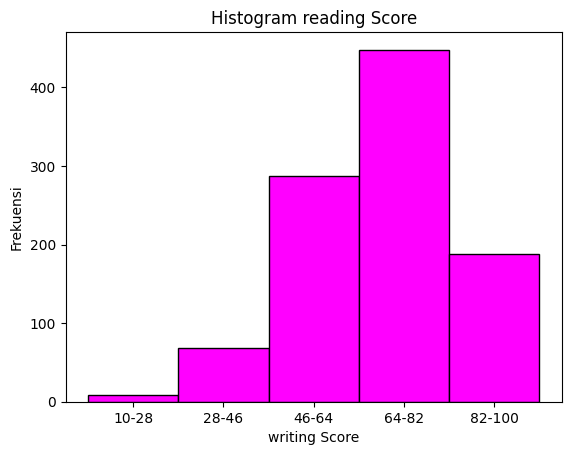

In [27]:
import matplotlib.pyplot as plt

# Ambil data kolom 'math score'
data_math = df["writing score"]

# Buat histogram
n, bins, patches = plt.hist(data_math, bins=5, color='magenta', edgecolor='black')

# Tambahkan Label
plt.title('Histogram reading Score')
plt.xlabel('writing Score')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()


In [11]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik

outliers_condition = ((df['math score'] > upper_bound) | (df['math score'] < lower_bound)) | (df['math score'] < 30) | (df['math score'] > 200)

# Drop baris yang memenuhi kondisi di atas (outliers)
df_cleaned = df[~outliers_condition]  # Tanda ~ untuk negasi (tidak termasuk kondisi outlier)

# Menampilkan data setelah penghapusan outliers
print(df_cleaned.tail())

     gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


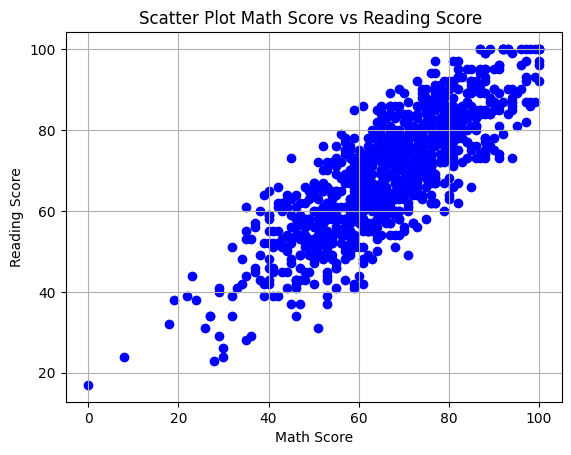

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv('StudentsPerformance.csv')

# Tampilkan beberapa baris pertama untuk memastikan data sudah benar
print(df.head())

# Buat scatter plot antara kolom 'math score' dan 'reading score'
plt.scatter(df['math score'], df['reading score'], color='blue', marker='o')

# Tambahkan Label
plt.title('Scatter Plot Math Score vs Reading Score ')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

# Tampilkan grid dan plot
plt.grid(True)
plt.show()


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


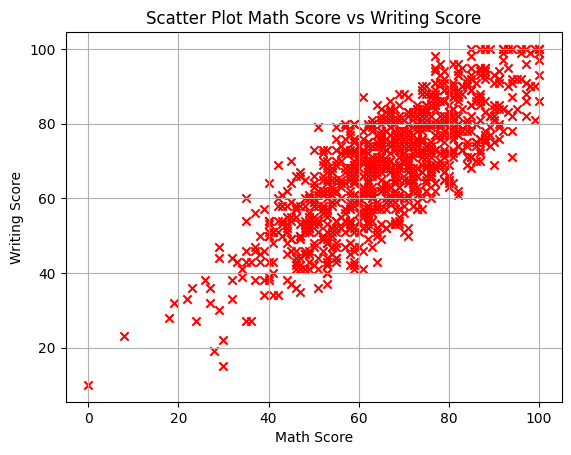

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv('StudentsPerformance.csv')

# Tampilkan beberapa baris pertama untuk memastikan data sudah benar
print(df.head())

# Buat scatter plot antara 'math score' dan 'writing score'
plt.scatter(df['math score'], df['writing score'], color='red', marker='x')

# Tambahkan Label
plt.title('Scatter Plot Math Score vs Writing Score')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')

# Tampilkan grid dan plot
plt.grid(True)
plt.show()
